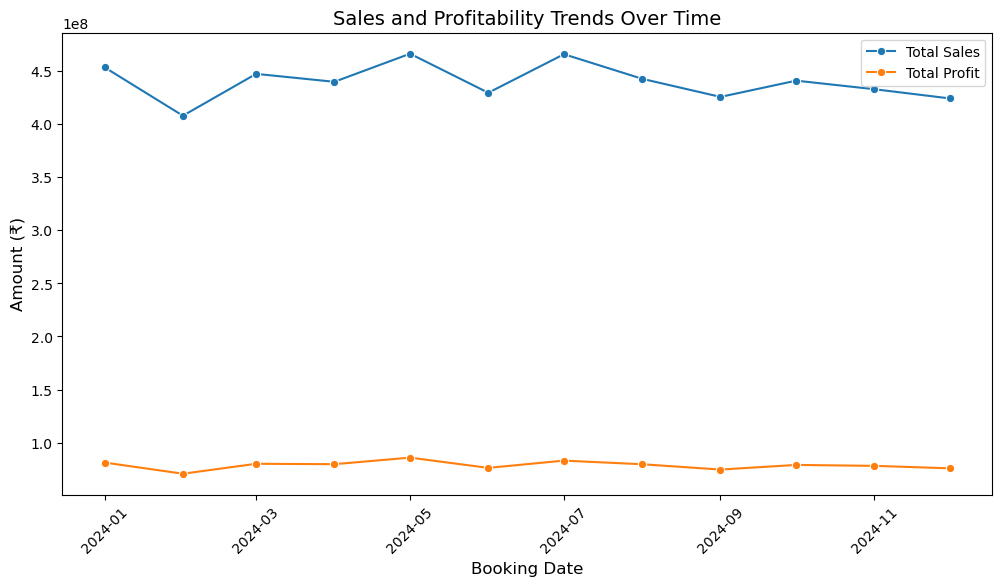

C:\Users\pal19\AppData\Local\Temp\ipykernel_28232\3159864252.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coupon_impact, x='Coupon Used?', y='avg_profit', palette='Blues_d')


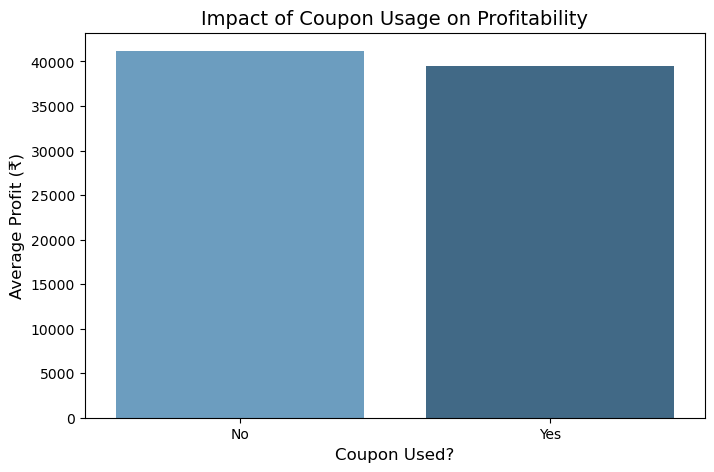

C:\Users\pal19\AppData\Local\Temp\ipykernel_28232\3159864252.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_destinations, x='Destination', y='total_sales', palette='viridis')


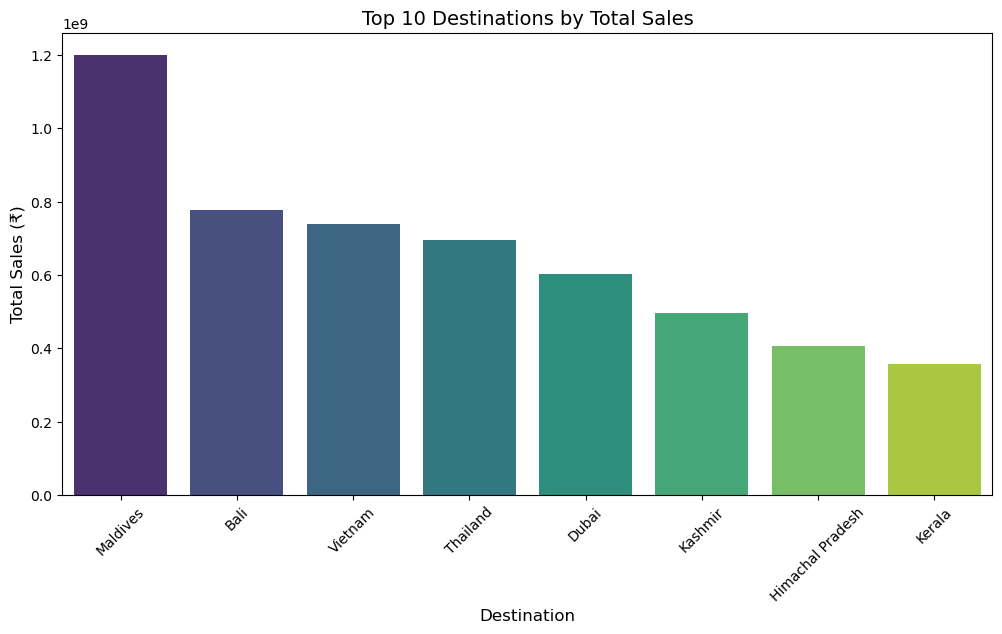

All visualizations have been saved successfully.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\pal19\Downloads\Dataset - 3.csv"
data = pd.read_csv(file_path)
data['Booking date'] = pd.to_datetime(data['Booking date'])
data['travel_date'] = pd.to_datetime(data['travel_date'])
data['profit'] = data['selling_price'] - data['costprice']
sales_trends = data.groupby(data['Booking date'].dt.to_period('M')).agg(
    total_sales=('selling_price', 'sum'),
    total_profit=('profit', 'sum')
).reset_index()
sales_trends['Booking date'] = sales_trends['Booking date'].dt.to_timestamp()

# Plot sales and profitability trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trends, x='Booking date', y='total_sales', label='Total Sales', marker='o')
sns.lineplot(data=sales_trends, x='Booking date', y='total_profit', label='Total Profit', marker='o')
plt.title('Sales and Profitability Trends Over Time', fontsize=14)
plt.ylabel('Amount (₹)', fontsize=12)
plt.xlabel('Booking Date', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
trend_plot_path = r"C:\Users\pal19\Downloads\sales_profitability_trends.png"
plt.savefig(trend_plot_path)
plt.show()

# Impact of Coupon Usage on Profitability
coupon_impact = data.groupby('Coupon Used?').agg(
    avg_profit=('profit', 'mean'),
    avg_selling_price=('selling_price', 'mean')
).reset_index()

# Plot coupon usage impact
plt.figure(figsize=(8, 5))
sns.barplot(data=coupon_impact, x='Coupon Used?', y='avg_profit', palette='Blues_d')
plt.title('Impact of Coupon Usage on Profitability', fontsize=14)
plt.ylabel('Average Profit (₹)', fontsize=12)
plt.xlabel('Coupon Used?', fontsize=12)
coupon_plot_path = r"C:\Users\pal19\Downloads\coupon_impact.png"
plt.savefig(coupon_plot_path)
plt.show()

# Destination-Wise Performance
destination_perf = data.groupby('Destination').agg(
    total_sales=('selling_price', 'sum'),
    total_profit=('profit', 'sum'),
    avg_pax=('pax', 'mean')
).sort_values(by='total_sales', ascending=False).reset_index()

# Plot destination-wise performance (Top 10)
top_destinations = destination_perf.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_destinations, x='Destination', y='total_sales', palette='viridis')
plt.title('Top 10 Destinations by Total Sales', fontsize=14)
plt.ylabel('Total Sales (₹)', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=45)
destination_plot_path = r"C:\Users\pal19\Downloads\destination_performance.png"
plt.savefig(destination_plot_path)
plt.show()

print("All visualizations have been saved successfully.")
